# SI 330: Homework 3 - To tokenize, or not to tokenize, that is the question: Natural language processing of Shakespearean text with NLTK


## Due: Friday, October 5, 2018,  11:59:00pm

### Submission instructions
After completing this homework, you will turn in three files via Canvas ->  Assignments -> Lab 3:
- Your Notebook, named `si330-hw3-YOUR_UNIQUE_NAME.ipynb` and
- the HTML file, named 1si330-hw3-YOUR_UNIQUE_NAME.html`

### Name:  Samantha Cohen 
### Uniqname: samcoh
### People you worked with: Rhea 

## Top-Level Goal
To use NLP techniques to determine which characters in Shakespeare's play "Hamlet" are most similar to each other, based on their spoken lines.

## Learning Objectives
After completing this Lab, you should know how to:
* use NLTK to normalize and tokenize text data
* calculate token-type ratios (TTR)
* use NLTK to extract n-grams
* calculate document similarity using cosines


### Note: possible BONUSes are highlighted throughout this notebook

### Outline of Steps For Analysis
Here's an overview of the steps that you'll need to do to complete this lab.
1. Load the raw text
2. Iterate through the text, extracting each character and the lines that they say
3. Tokenize and normalize the text
4. Remove stopwords
5. Calculate token-type ration for each character
6. Calculate cosine similarity between each character (we supply the functions to do this)
7. List the top 10 most similar characters, based on cosine similarity of the lines they say
8. Visualize the results (we supply the code)

BONUS. Repeat steps 6 to 8 with bigrams (n-grams where n=2) and trigrams (n-grams where n=3)

Each of these steps is detailed below.

Before we start the analysis, let's load the libraries that we'll need.  You should recognize re, nltk, and defaultdict (from collections).  We're also going to peek into the future of this course and use some functionality from pandas (which some of you have already used) and we're going to do some plotting so we'll use matplotlib and Seaborn.  You'll learn more about those later in the course; for now, we're just going to give you code that uses those libraries.

## Part 0: Setup

**NOTE: If the next code cell fails because of missing libraries, install them like you installed nltk (look at the lab for instructions on how to do that)**

In [2]:
import re
import nltk
from nltk.tokenize import RegexpTokenizer
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
from collections import defaultdict
%matplotlib inline

## Part 1: Load the text

Just like we did in the lab, we're going to load the text from one of NLTK's corpora (in this case, the tragic play "Hamlet") into a variable and print the first 500 or so characters.

**NOTE: If you print substantially more than 500 characters, make sure you clear your output before saving your
notebook.  Failing to do so may make your notebook unopenable in future sessions.**

In [3]:
raw_text = nltk.corpus.gutenberg.raw('shakespeare-hamlet.txt')

# Print the first 490 characters of the text.
print(raw_text[:490])

[The Tragedie of Hamlet by William Shakespeare 1599]


Actus Primus. Scoena Prima.

Enter Barnardo and Francisco two Centinels.

  Barnardo. Who's there?
  Fran. Nay answer me: Stand & vnfold
your selfe

   Bar. Long liue the King

   Fran. Barnardo?
  Bar. He

   Fran. You come most carefully vpon your houre

   Bar. 'Tis now strook twelue, get thee to bed Francisco

   Fran. For this releefe much thankes: 'Tis bitter cold,
And I am sicke at heart

   Barn. Haue you had quiet Guard?
 


## Part 2.1: Split lines into character names and spoken lines

Next, we will retrieve the lines spoken by each character in the play and store them in a dictionary.

You will store lines into a dictionary with:

- **keys** equal to character names
- **values** equal to a list, where each element of the list is one line spoken by that character.

Thus, for the example of `raw_text[:490]` from above, you should get something like this:

```python
            {'Barnardo': [" Who's there?"],
             'Fran': [' Nay answer me: Stand & vnfold\nyour selfe',
              ' Barnardo?',
              ' You come most carefully vpon your houre',
              " For this releefe much thankes: 'Tis bitter cold,\nAnd I am sicke at heart"],
             'Bar': [' Long liue the King',
              ' He',
              " 'Tis now strook twelue, get thee to bed Francisco"],
             'Barn': [' Haue you had quiet Guard?']}
```

We recommend you test your work on `raw_text[:490]` until it works, then change the code to apply your solution to the full `raw_text`.

In [7]:
# CHANGE ME: Replace `None` in with a regular expression that pulls out one character and statement
# HINT 1: As in re.findall, you can use multiple capture groups in RegexpTokenizer
# HINT 2: You may want to read about positive lookahead regular expressions
character_tokenizer = RegexpTokenizer(r'^ {2,}([A-Z][a-z]+)\.(.*?)\n(?= )')

character_line_tokens = character_tokenizer.tokenize(raw_text) # CHANGE ME: after testing on raw_text[:490], change this to raw_text to use the full dataset
#print(character_line_tokens)
#CHANGE ME: insert code to populate the character_lines data structure
character_lines = defaultdict(list)
for actor,line in character_line_tokens: 
    character_lines[actor].append(line)

#character_lines

## Part 2.2: Split lines into character names and spoken lines, but collapse abbreviated names into one 

When you do **Part 2.1**, you may notice that there seem to be a number of different abbreviations used for the same
characters. For example, "Barnardo" is referred to as "Barn", "Bar", etc. 

Re-do **Part 2.1** below, but write your code so that abbreviations of the same name are merged into one entry.

For **BONUS** points, it would be best to (1) look up the actual list of characters (use Google) and map the abbreviations onto the
full names of the characters and (2) use this opportunity to eliminate stage directions / any other questionable lines that managed
to slip through your regular expression.

Thus, for the example of `raw_text[:490]` from above, you should get:

```python
            {'Barnardo': [" Who's there?",
              ' Long liue the King',
              ' He',
              " 'Tis now strook twelue, get thee to bed Francisco",
              ' Haue you had quiet Guard?'],
             'Francisco': [' Nay answer me: Stand & vnfold\nyour selfe',
              ' Barnardo?',
              ' You come most carefully vpon your houre',
              " For this releefe much thankes: 'Tis bitter cold,\nAnd I am sicke at heart"]}
```

As in Part 2.1, We recommend you test your work on `raw_text[:490]` until it works, then change the code to apply your solution to the full `raw_text`.

In [8]:
#used this to create my dictionary 
character_list='''
HAMLET,
CLAUDIUS, 
GHOST,
GERTRUDE,
POLONIUS,
LAERTES,
OPHELIA,
HORATIO,
FORTINBRAS,
VOLTEMAND,
CORNELIUS,
ROSENCRANTZ,
GUILDENSTERN,
MARCELLUS,
BARNARDO,
FRANCISCO,
OSRIC,
REYNALDO,
Players,
Gentleman,
Priest,
Clowns,
Captain,
Ambassadors,
Lords,
Ladies, 
Officers,
Soldiers,
Sailors,
Messengers,
Attendants, 
King, 
Queen, 
Both, 
All, 
Bapt, 
Say, 
Other, 
Lucian
'''.split(",")
character_list = [character.lower().strip().capitalize() for character in character_list]
characters = RegexpTokenizer(r'^ {2,}([A-Z][a-z]+)\.')
abbrev = sorted(set(characters.tokenize(raw_text)))
#print(abbrev)
#print(character_list)

['Al', 'All', 'Amb', 'Bap', 'Bapt', 'Bar', 'Barn', 'Barnardo', 'Both', 'Cap', 'Clo', 'Clown', 'For', 'Fortin', 'Fra', 'Fran', 'Gen', 'Gho', 'Ghost', 'Guil', 'Guild', 'Ha', 'Ham', 'Hamlet', 'Hor', 'Hora', 'Horat', 'Kin', 'King', 'La', 'Laer', 'Lucian', 'Mar', 'Marcell', 'Mes', 'Ophe', 'Ophel', 'Osr', 'Osricke', 'Other', 'Play', 'Player', 'Pol', 'Polon', 'Priest', 'Qu', 'Queen', 'Queene', 'Reynol', 'Ro', 'Rosin', 'Say', 'Ser', 'Volt']


In [5]:
mapped_characters = {
 'Hamlet': ['Ha', 'Ham', 'Hamlet'], 
 'Claudius': ['Claudius'], 
 'Ghost': ['Gho', 'Ghost'],
 'Gertrude':['Gertrude'], 
 'Polonius':['Pol', 'Polon','Polonius'], 
 'Laertes':['La', 'Laer','Laertes'] ,
 'Ophelia': ['Ophe', 'Ophel','Ophelia'],
 'Horatio': ['Hor', 'Hora', 'Horat','Horatio'],
 'Fortinbras': ['For', 'Fortin','Fortinbras'],
 'Voltemand': ["Volt","Voltemand"],
 'Cornelius':['Cornelius'],
 'Rosencrantz': ['Ro', 'Rosin','Rosencrantz'],
 'Guildenstern': ['Guil', 'Guild','Guildenstern'],
 'Marcellus': ['Mar', 'Marcell','Marcellus'],
 'Barnardo': ['Bar', 'Barn', 'Barnardo'],
 'Francisco': ['Fra', 'Fran','Francisco'],
 'Osric': ['Osr', 'Osricke', 'Osric'], 
 'Reynaldo': ['Reynol','Reynaldo'], 
 'Players': ['Play', 'Player', 'Players'],
 'Gentleman': ['Gen','Gentleman'],
 'Priest':['Priest'],
 'Clowns': ['Clo', 'Clown', 'Clowns'],
 'Captain': ['Cap', 'Captain'],
 'Ambassadors': ['Amb','Ambassadors'],
 'Lords':['Lords'],
 'Ladies':['Ladies'],
 'Officers':['Officers'],
 'Soldiers':['Soldiers'],
 'Sailors':['Sailors',"Say"],
 'Messengers': ['Mes','Messengers'], 
 'Attendants':['Attendants'],
 'King': ['Kin', 'King'],
 'Queen': ['Qu', 'Queene','Queen'],
 'None': ["Both","All", "Al", "Other", "Exeunt"],
 'Baptista': ['Bap', 'Bapt'],
 'Lucian':['Lucian'], 
 "Servant": ["Ser", "Servant"]
}
reverse = {abbr: name for name,li_abbr in mapped_characters.items() for abbr in li_abbr }
#print(reverse)


character_tokenizer = RegexpTokenizer(r'^ {2,}([A-Z][a-z]+)\.(.*?)\n(?= )')
character_line_tokens = character_tokenizer.tokenize(raw_text) # CHANGE ME: after testing on raw_text[:490], change this to raw_text to use the full dataset
character_lines = defaultdict(list) 
for actor, line in character_line_tokens: 
    character_lines[reverse[actor]].append(line)
#     actor = [reverse[key] for key in reverse if actor == key][0]
#     if actor in character_lines:
#         character_lines[actor] = character_lines[actor] + [line]
#     else: 
#         character_lines[actor] = [line]
del character_lines["None"]
#print(character_lines)

## Part 3: Normalize and tokenize the text
Within each character's set of lines, merge all the lines into a list of normalized word tokens. That is:

1. Tokenize each line into words
2. Normalize the tokens (e.g. make them lowercase)
3. Make a dictionary where **keys** are characters and **values** are a list of normalized word tokens from their lines

For `raw_text[:490]`, the resulting data structure (which we'll call `character_words`) would look like something this (if you had done the bonus in Part 2.2):

```python
{'Barnardo': ["who's",
              'there',
              'long',
              'liue',
              'the',
              'king',
              'he',
              "'tis",
              'now',
              'strook',
              'twelue',
              'get',
              'thee',
              'to',
              'bed',
              'francisco',
              'haue',
              'you',
              'had',
              'quiet',
              'guard'],
             'Francisco': ['nay',
              'answer',
              'me',
              'stand',
              'vnfold',
              'your',
              'selfe',
              'barnardo',
              'you',
              'come',
              'most',
              'carefully',
              'vpon',
              'your',
              'houre',
              'for',
              'this',
              'releefe',
              'much',
              'thankes',
              "'tis",
              'bitter',
              'cold',
              'and',
              'i',
              'am',
              'sicke',
              'at',
              'heart']}
```

For a **BONUS**, write your solution using only comprehensions, no loops.

In [15]:
# CHANGE ME: insert your code to create and populate `character_words` below
character_words = {}
for actor,list_lines in character_lines.items(): 
    for line in list_lines:
        tokenizer = RegexpTokenizer(r'([\w\']+)')
        word_tokens = tokenizer.tokenize(line)
        for word in word_tokens: 
            word = word.lower()
            if actor in character_words:
                #if word not in character_words[actor]: #this makes sure words are unique 
                character_words[actor] = character_words[actor] + [word] 
            else: 
                character_words[actor] = [word] 
#character_words 

## Part 4: Remove stopwords

For each character, update your their list of words to remove stopwords.

In [7]:
# CHANGE ME: insert your code here, assigning the result to character_words_filtered
stop_words = nltk.corpus.stopwords.words("english")
character_words_filtered = {}
for actor,words in character_words.items():
    words_not_stop = [word for word in character_words[actor] if word not in stop_words]
    character_words_filtered[actor] = words_not_stop
#character_words_filtered       

## Part 5:  Calculate token-type ratios for each character

We would like to compare the Type-Token Ratio (TTR) for the different cast members.

For each character, use the dictionary created in Part 4 to calculate their:
1. total number of word tokens
2. totle number of word types
3. token-type ratio

Print the results in a readable, attractive format.

In [8]:
# CHANGE ME: insert your code here
for actor,list_ in character_words_filtered.items(): 
    word_token =len(list_)
    unique_words = len(set(list_))
    total = word_token/unique_words
    print("{}:\n\ttotal number of word tokens: {}\n\ttotal number of word types: {} \n\ttoken-type ratio: {}".format(actor,word_token, unique_words,total))

Barnardo:
	total number of word tokens: 97
	total number of word types: 80 
	token-type ratio: 1.2125
Francisco:
	total number of word tokens: 34
	total number of word types: 31 
	token-type ratio: 1.096774193548387
Horatio:
	total number of word tokens: 931
	total number of word types: 601 
	token-type ratio: 1.5490848585690515
Marcellus:
	total number of word tokens: 240
	total number of word types: 193 
	token-type ratio: 1.2435233160621761
King:
	total number of word tokens: 2253
	total number of word types: 1210 
	token-type ratio: 1.8619834710743801
Voltemand:
	total number of word tokens: 80
	total number of word types: 77 
	token-type ratio: 1.0389610389610389
Laertes:
	total number of word tokens: 764
	total number of word types: 523 
	token-type ratio: 1.4608030592734225
Polonius:
	total number of word tokens: 1348
	total number of word types: 784 
	token-type ratio: 1.719387755102041
Hamlet:
	total number of word tokens: 5671
	total number of word types: 2510 
	token-type ra

## Part 6: Cosine similarity
We want to compare the similarity of two lists of words.  A document is a collection of words, and we can create a _vector_ representing that document with as many dimensions as there are words, and a value (the word count) that represents the length of the vector on that axis (the word).

We will use **cosine similarity** to compare two documents (lists of words).

Consider the following text:
>"This course is awesome."

We could create a vector representation of the normalized (i.e. lowercased) version of it:

|Word|Count|
|---|---|
|this | 1 | 
| course | 1 | 
| is | 1 |
| awesome | 1 |

Now let's take another text:

>"This course is an awesome course."

The vector representation of that (normalized) text would be:

| Word | Count | 
| --- | --- |
| this | 1 |
| course | 2 |
| is | 1 | 
| an | 1 |
| awesome | 1 | 

If we **align** the two vectors, we get:

| Word | Count(A) | Count(B) | *A\[Word\]*×*B\[Word\]* |
| --- | --- | --- | --- |
| this | 1 | 1 | 1×1 = 1 |
| course | 1 | 2 | 1×2 = 2 |
| is | 1 | 1 | 1×1 = 1 |
| an | 0 | 1 | 0×1 = 0 |
| awesome | 1 | 1 | 1×1 = 1 |

To calculate the cosine similarity, we take the dot product (also known as the inner product) of the two
vectors and *normalize* it to the length of the two vectors.

The dot product is just the sum of the last column in the table above:

$$
\begin{align}
\textit{dot product} &= A \cdot B\\
&=1\times1 + 1\times2 + 1\times1 + 0\times1 + 1\times1\\
&=5
\end{align}
$$

Then, **cosine similarity** is:

$$
\begin{align}
\textit{cosine similarity} &= \cos(\theta)\\
&= {\textit{dot product} \over \|\mathbf{A}\| \|\mathbf{B}\|}\\
&= {\mathbf{A} \cdot \mathbf{B} \over \|\mathbf{A}\| \|\mathbf{B}\|}\\
&= {\mathbf{A} \cdot \mathbf{B} \over \sqrt{\mathbf{A}\cdot\mathbf{A}} \sqrt{\mathbf{B}\cdot\mathbf{B}}}
\end{align}
$$

For the above example, this is:

$$
\begin{align}
\textit{cosine similarity}(A,B) &= \cos(\theta)\\
&= {\mathbf{A} \cdot \mathbf{B} \over \sqrt{\mathbf{A}\cdot\mathbf{A}} \sqrt{\mathbf{B}\cdot\mathbf{B}}}\\
&= {5 \over \sqrt{4} \sqrt{8}}\\
&\approx 0.884
\end{align}
$$


Put another way, if we represent the two documents as vectors based on their word counts, **cosine similarity** is the cosine of the angle between them. So documents that use words at similar frequencies will be more similar to each other. When this value is 1, the documents are the most similar (i.e., they are the same), because $\cos(0) = 1$.

Thus: 

#### $cos(\theta) = 1$ means that the two documents are identical
#### $cos(\theta) = 0$ means that the two documents have no words in common




To calculate cosine similarity, we would want word count vectors for each character. In the above example, those dictionaries would look like this:

```python
A = {"this": 1,"course": 1,"is": 1, "awesome": 1}
```
and 

```python
B = {"this": 1,"course": 2,"is": 1, "an": 1, "awesome": 1}
```

We have created the function <b>```cosine_similarity```</b> for you which will calculate the similarity measure given vectors in the above format. You will need to pass two dictionaries into the function, where the key is the word and the value is the count for the word.

In [9]:
import math

def cosine_similarity(D1,D2):
    """
    The input is a list of (word,freq) pairs.
    Return the angle between these two vectors.
    """
    numerator = dot_product(D1,D2)
    denominator = math.sqrt(dot_product(D1,D1) * dot_product(D2,D2))
    return (numerator/denominator)

def dot_product(D1,D2):
    """
    Inner product between two vectors, where vectors
    are represented as dictionaries of (word,freq) pairs.
    Example: inner_product({"and":3,"of":2,"the":5},
                           {"and":4,"in":1,"of":1,"this":2}) = 14.0 
    """
    sum_ = 0.0
    for key in D1:
        if key in D2:
            sum_ += D1[key] * D2[key]
    return sum_

Using the example from above:

In [10]:
A = {"this": 1,"course": 1,"is": 1, "awesome": 1}
B = {"this": 1,"course": 2,"is": 1, "an": 1, "awesome": 1}
cosine_similarity(A,B)

0.8838834764831843

**Use `character_words_filtered` and the cosine_similarity function to generate a dictionary of the pairwise similarity of characters, called `similarities`.** That is, the dictionary should have:
- **keys** that are 2-tuples of character names.
- **values** that are the cosine similarity between those characters.

Thus, the dictionary should look something like this:

```python
{
    ('King', 'Polonius'): 0.432143214312431,
    ('Francisco', 'Barnardo'): 0.123412352134,
    ...
}
```

(the above numbers are made up for an example)


In [11]:
# CHANGE ME: we recommend you proceed in two steps:
# First, create a dictionary-of-dictionaries, where the keys are the characters and the values are the word vectors for that character
import itertools
from itertools import combinations 
# CHANGE ME: we recommend you proceed in two steps:
# First, create a dictionary-of-dictionaries, where the keys are the characters and the values are the word vectors for that character
character_word_vectors = {}

for character in list(character_words_filtered.keys()):
    characters = defaultdict(int)
    for word in character_words_filtered[character]: 
        characters[word]+=1 
    character_word_vectors[character] = characters

# # Second, create the `similarities` data structure described above:
similarities = {}
for first_char, sec_char in itertools.combinations(character_word_vectors.keys(),2): 
    similarities[(first_char, sec_char)] = cosine_similarity(character_word_vectors[first_char], character_word_vectors[sec_char]) 
    
#print(similarities)
#print(character_word_vectors)  


## Part 7: Print the top 10 most similar characters, based on cosine similarity of what they said

In [12]:
# CHANGE ME: insert your code here
top_ten =sorted(similarities.items(), key = lambda x: x[1], reverse = True)[:10]
for x in top_ten: 
    print(x)

(('Reynaldo', 'Guildenstern'), 0.738042355811118)
(('King', 'Hamlet'), 0.7077411870383735)
(('Horatio', 'Reynaldo'), 0.7040677583391868)
(('Ophelia', 'Reynaldo'), 0.6939687541018036)
(('Reynaldo', 'Rosencrantz'), 0.6907924267035294)
(('Horatio', 'Ophelia'), 0.6830299550981846)
(('Horatio', 'Rosencrantz'), 0.6694208494513576)
(('Reynaldo', 'Gentleman'), 0.6527912098338668)
(('Ophelia', 'Rosencrantz'), 0.6404940774337633)
(('Reynaldo', 'Captain'), 0.6396021490668313)


## Part 8: Visualize the similarity matrix
We're jumping ahead a bit in this step, but we're supplying the code for you.  Assuming your data is in the
format specified in Step 7 (above), you should be able to simply run the next code block to generate a 
heatmap of the correlation matrix.

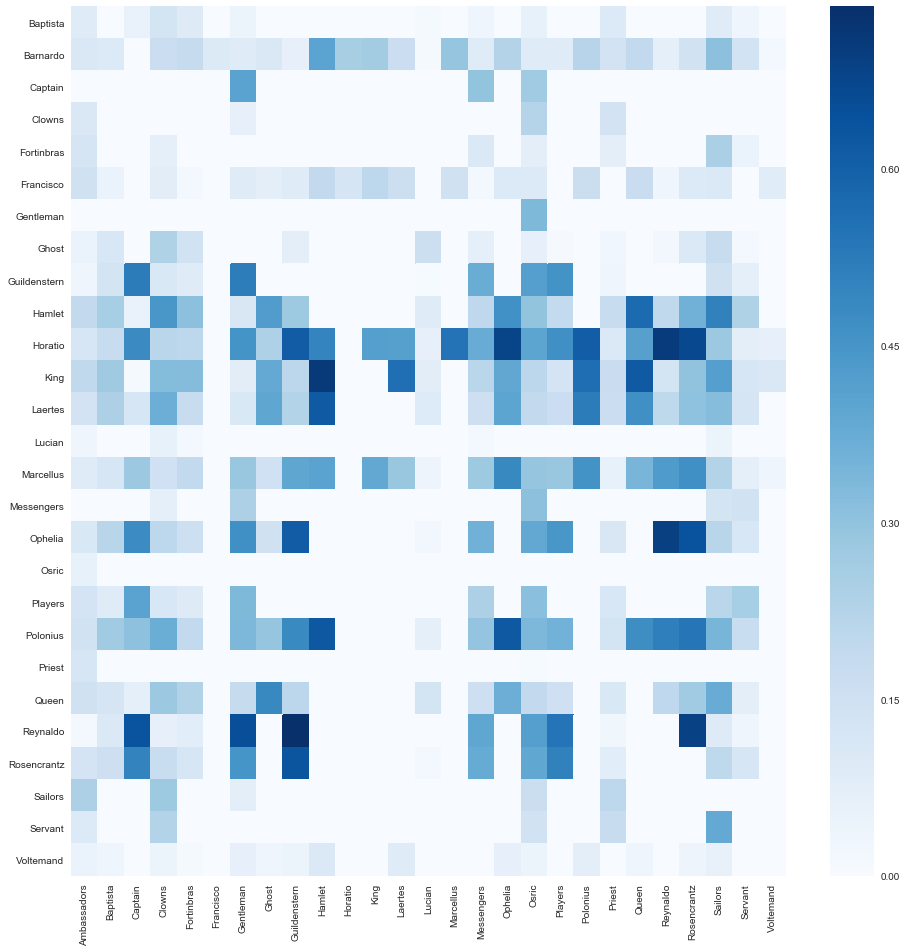

In [13]:
# You should not have to modify the following code
ser = pd.Series(list(similarities.values()),
                  index=pd.MultiIndex.from_tuples(similarities.keys()))
df = ser.unstack().fillna(0)
df.shape
sns.set(rc={"figure.figsize": (16, 16)})
sns.heatmap(df,cmap="Blues");

## BONUS: Repeat Parts 6-8, once using bigrams and once using trigrams

**NOTE: You can copy the code and run it or you can go refactor your code above so that you create functions that take parameters (line the n for n-grams) and then call those functions**